1.A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  



In [ ]:
from google.colab import files
upload=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data (1).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
median_sales=df["Sales"].median()

In [ ]:
df["Sales"]=["High" if value > median_sales
             else "Low" for value in df["Sales"]]
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Columns_to_encoder=["Sales","ShelveLoc","Urban","US"]
for column in Columns_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [ ]:
X=df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:

Y=df["Sales"]
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

In [ ]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,-0.035578,-0.123460,-0.251910,-0.069327,0.392275,-0.106962,0.186707,0.028847,0.047090,-0.142579
CompPrice,-0.035578,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.123460,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.251910,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.069327,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.392275,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,-0.106962,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,0.186707,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.028847,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.047090,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion ='entropy',max_depth=3)
DTC.fit(X_train,Y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score Training Data:",ac1.round(3))
print("accuracy Score Test Data:",ac2.round(3))


Accuracy Score Training Data: 0.743
accuracy Score Test Data: 0.63


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=150,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)


RandomForestClassifier(max_features=0.7, max_samples=0.6, n_estimators=150)

In [ ]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Random Forest for Training Data:",ac1.round(3))
print("Random Forest For Test Data:",ac2.round(3))



Random Forest for Training Data: 0.993
Random Forest For Test Data: 0.84


[Text(0.5, 0.875, 'x[4] <= 131.5\nentropy = 1.0\nsamples = 300\nvalue = [150, 150]'),
 Text(0.25, 0.625, 'x[2] <= 7.5\nentropy = 0.974\nsamples = 227\nvalue = [135, 92]'),
 Text(0.125, 0.375, 'x[4] <= 71.0\nentropy = 0.993\nsamples = 131\nvalue = [59, 72]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.976\nsamples = 122\nvalue = [50, 72]'),
 Text(0.375, 0.375, 'x[1] <= 70.0\nentropy = 0.738\nsamples = 96\nvalue = [76, 20]'),
 Text(0.3125, 0.125, 'entropy = 0.939\nsamples = 45\nvalue = [29, 16]'),
 Text(0.4375, 0.125, 'entropy = 0.397\nsamples = 51\nvalue = [47, 4]'),
 Text(0.75, 0.625, 'x[0] <= 147.5\nentropy = 0.733\nsamples = 73\nvalue = [15, 58]'),
 Text(0.625, 0.375, 'x[1] <= 62.0\nentropy = 0.434\nsamples = 56\nvalue = [5, 51]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.6875, 0.125, 'entropy = 0.663\nsamples = 29\nvalue = [5, 24]'),
 Text(0.875, 0.375, 'x[4] <= 149.5\nentropy = 0.977\nsa

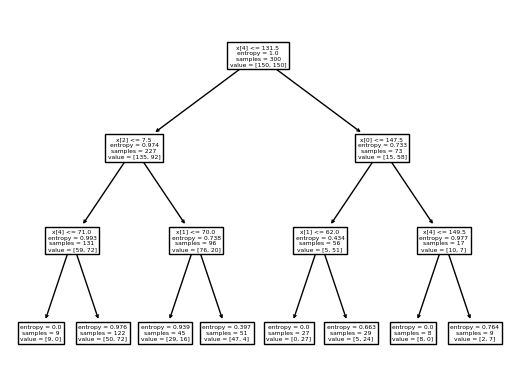

In [ ]:
from sklearn import tree
tree.plot_tree(DTC)


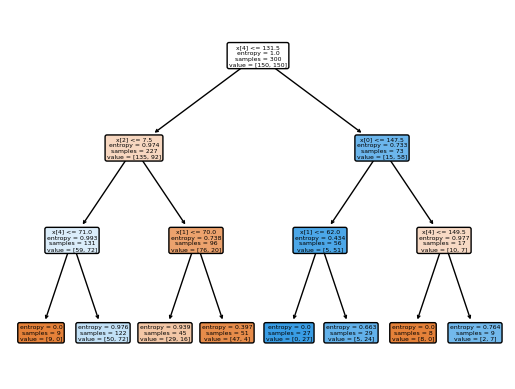

In [ ]:
from sklearn import tree
import graphviz
ata=tree.plot_tree(DTC,filled=True,rounded=True)


2.Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
from google.colab import files
upload=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check (1).csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [ ]:
df["Taxable.Income"]=["Good" if value > 30000
                      else "Risky" for value in df["Taxable.Income"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Columns_to_encoder=["Undergrad","Marital.Status","Taxable.Income"]
for column in Columns_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,YES
1,1,0,0,134075,18,YES
2,0,1,0,160205,30,YES
3,1,2,0,193264,15,YES
4,0,1,0,27533,28,NO
...,...,...,...,...,...,...
595,1,0,0,39492,7,YES
596,1,0,0,55369,2,YES
597,0,0,0,154058,0,YES
598,1,1,0,180083,17,NO


In [ ]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
X=df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y=df["Taxable.Income"]

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score For Test Data:",ac2.round(3))


Accuracy Score for Training Data: 1.0
Accuracy Score For Test Data: 0.7


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)


RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [ ]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score For Test Data:",ac2.round(3))


Accuracy Score for Training Data: 0.997
Accuracy Score For Test Data: 0.84


[Text(0.5978365384615385, 0.9615384615384616, 'x[4] <= 131.5\ngini = 0.499\nsamples = 300\nvalue = [155, 145]'),
 Text(0.2918269230769231, 0.8846153846153846, 'x[5] <= 0.5\ngini = 0.476\nsamples = 226\nvalue = [138, 88]'),
 Text(0.12307692307692308, 0.8076923076923077, 'x[4] <= 93.0\ngini = 0.456\nsamples = 54\nvalue = [19, 35]'),
 Text(0.06153846153846154, 0.7307692307692307, 'x[1] <= 49.0\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.03076923076923077, 0.6538461538461539, 'x[0] <= 124.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.015384615384615385, 0.5769230769230769, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.046153846153846156, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09230769230769231, 0.6538461538461539, 'x[3] <= 120.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.07692307692307693, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1076923076923077, 0.5769230769230769, 'gini = 0.0\nsamples 

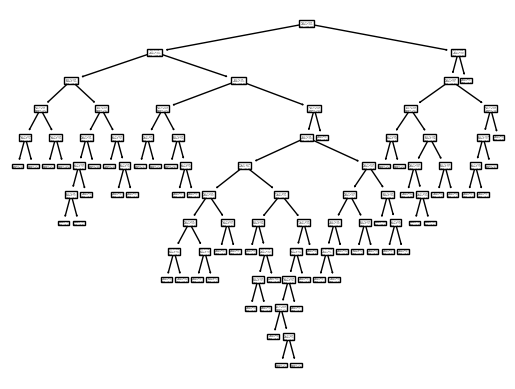

In [ ]:
from sklearn import tree
tree.plot_tree(DTC)
